In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
img_array=cv2.imread("Test_Dataset/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

NameError: name 'cv2' is not defined

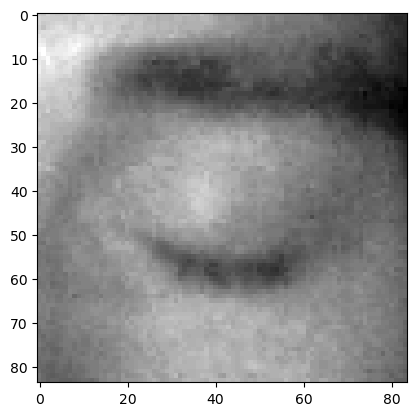

In [86]:
plt.imshow(img_array,cmap="gray")

In [87]:
print(img_array.shape)

(84, 84)


In [88]:
!pip install opencv-python==4.9.0.80

# READING ALL THE IMAGES AND CONVERTING THEM INTO AN ARRAY FOR DATA AND LABELS

In [89]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category) #0,1 #[closed eyes or open eyes]
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [90]:
create_training_Data()

In [91]:
print(len(training_Data))

670


In [92]:
import random
random.shuffle(training_Data)

In [93]:
X=[]
y=[]
img_size=224
for feature,label in training_Data:
    X.append(feature)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [94]:
X=X/255.0; #normalizing it

In [95]:
Y=np.array(y)

In [96]:
import pickle  #converting both datas and labels into array

pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [97]:
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

# DEEP LEARNING MODEL FOR TRAINING-TRANSFER LEARNING

In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [99]:
model=tf.keras.applications.mobilenet.MobileNet()

In [100]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

#TRANSFER LEARNING

In [101]:
base_input=model.layers[0].input

In [102]:
base_output=model.layers[-4].output

In [103]:
Flat_layers=layers.Flatten()(base_output) # flatterning the layer
final_output=layers.Dense(1)(Flat_layers)  # one node 
final_output=layers.Activation('sigmoid')(final_output) #sigmoid as activation function as its binary classification


In [104]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [105]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

#SETTINGS FOR BINARY CLASSIFICATION (OPEN/CLOSED)

In [106]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [173]:
new_model.fit(X,Y,epochs=10,validation_split=0.1)

Epoch 1/10
19/19 [==============================] - 34s 2s/step - loss: 0.0628 - accuracy: 0.9801 - val_loss: 2.3317 - val_accuracy: 0.4478
Epoch 2/10
19/19 [==============================] - 29s 2s/step - loss: 0.0456 - accuracy: 0.9950 - val_loss: 0.3796 - val_accuracy: 0.7910
Epoch 3/10
19/19 [==============================] - 29s 2s/step - loss: 0.0233 - accuracy: 0.9950 - val_loss: 1.3378 - val_accuracy: 0.4478
Epoch 4/10
19/19 [==============================] - 29s 2s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.5861 - val_accuracy: 0.5970
Epoch 5/10
19/19 [==============================] - 29s 2s/step - loss: 0.0103 - accuracy: 0.9934 - val_loss: 3.0549 - val_accuracy: 0.5522
Epoch 6/10
19/19 [==============================] - 29s 2s/step - loss: 0.0261 - accuracy: 0.9950 - val_loss: 2.4898 - val_accuracy: 0.5522
Epoch 7/10
19/19 [==============================] - 29s 2s/step - loss: 0.0098 - accuracy: 0.9950 - val_loss: 0.6754 - val_accuracy: 0.6269
Epoch 8/10
19/19 [==

In [174]:
new_model.save('my_model.h5')

C:\Users\maste\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [175]:
img_array=cv2.imread('s0001_00006_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [176]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [177]:
X_input.shape

(1, 224, 224, 3)

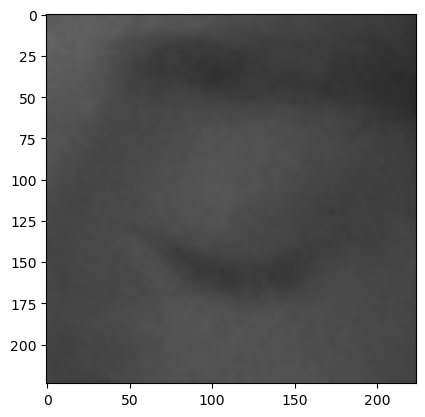

In [178]:
plt.imshow(new_array)

In [179]:
X_input=X_input/255.0

In [180]:
prediction=new_model.predict(X_input)

1/1 [==============================] - 0s 93ms/step


In [181]:
prediction

array([[2.7747622e-06]], dtype=float32)

In [182]:
img_array=cv2.imread('s0001_01871_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [183]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [184]:
X_input.shape

(1, 224, 224, 3)

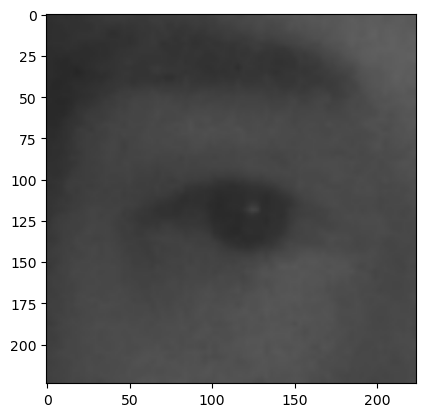

In [185]:
plt.imshow(new_array)

In [186]:
X_input=X_input/255.0

In [187]:
prediction=new_model.predict(X_input)

1/1 [==============================] - 0s 75ms/step


In [188]:
prediction

array([[0.81693184]], dtype=float32)

In [189]:
img_array=cv2.imread('images.jpeg',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [190]:
 img=cv2.imread('images.jpeg')

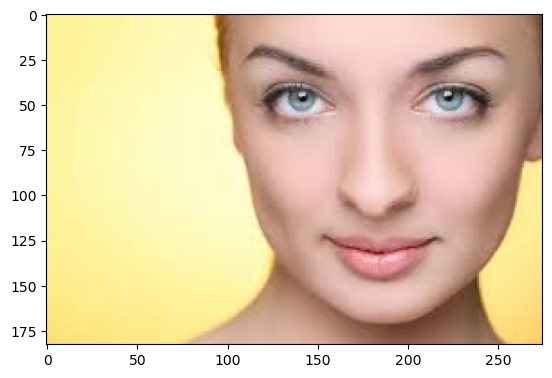

In [191]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [192]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalcatface.2.xml')

In [193]:
eye_Cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [194]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [195]:
eyes=eye_Cascade.detectMultiScale(gray,1.1,4)

In [196]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

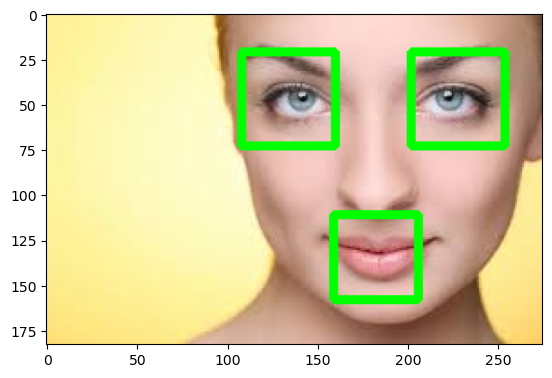

In [197]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [198]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
eyes= eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected or identifies")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

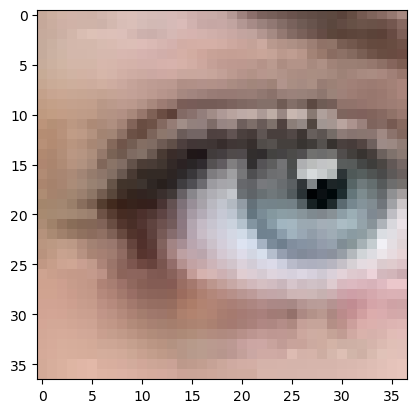

In [199]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [200]:
eyes_roi.shape

(37, 37, 3)

In [201]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image= np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [202]:
final_image.shape

(1, 224, 224, 3)

In [203]:
new_model.predict(final_image)

1/1 [==============================] - 0s 91ms/step


array([[0.9998789]], dtype=float32)